In [4]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import pandas as pd
import networkx as nx

In [2]:
data = pd.read_csv("network.tsv", delimiter = '\t')
data = data.to_numpy()
data = data[ np.arange(len(data)) != (data[:,0] == "# Disease(MESH)").argmax() ]
data

array([['MESH:D005923', 'DB00564'],
       ['MESH:D009503', 'DB01072'],
       ['MESH:D016115', 'DB01759'],
       ...,
       ['MESH:D010518', 'DB04216'],
       ['MESH:D002653', 'DB02701'],
       ['MESH:D013119', 'DB04465']], dtype=object)

In [43]:
G = nx.Graph()
for d in data:
    G.add_edge(d[0],d[1])

In [7]:
diseases  = np.unique(data[:,0])
chemicals = np.unique(data[:,1])

280.7797833935018


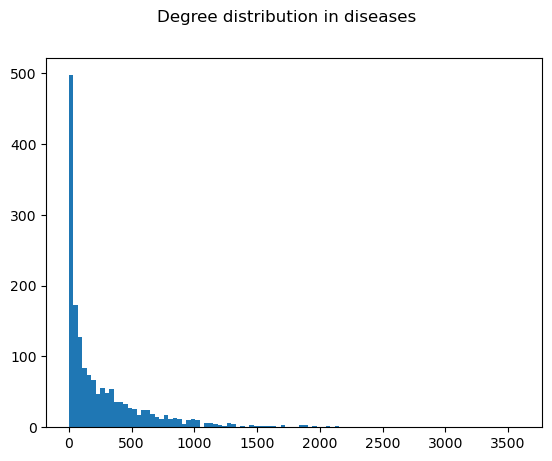

In [19]:
def plot_degree_dist(G, subset, titolo):
    degrees = [G.degree(n) for n in subset]
    print(np.mean(degrees))
    plt.figure()
    plt.suptitle(titolo)
    plt.hist(degrees, bins = 100)
    plt.show()
    
plot_degree_dist(G, chemicals, "Degree distribution in diseases")

In [17]:
nx.density(G)

0.018021220162838834

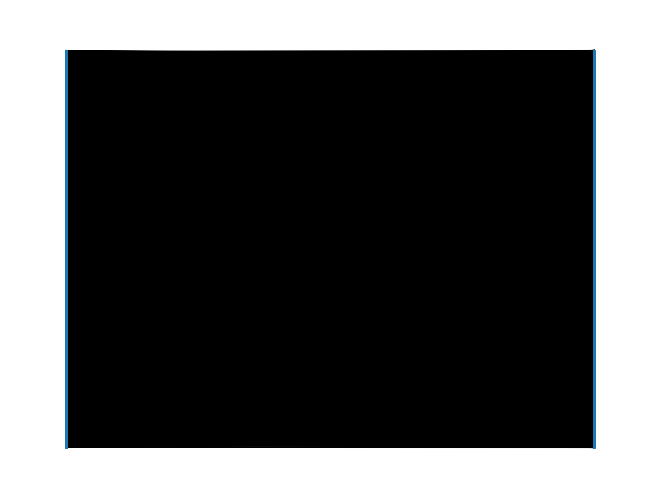

In [23]:
nx.draw(G, pos = nx.bipartite_layout(G, diseases) , node_size = 1.)

In [82]:
babyG = nx.Graph()
degrees = [G.degree(n) for n in G.nodes]
names_degrees = np.c_[ [n for n in G.nodes], degrees ]
names_degrees = names_degrees[names_degrees[:,1].argsort()[-1::-1]]
names_degrees = names_degrees[:30]
candidati     = {}
for n in names_degrees:
    candidati[n[0]] = n[1]
for i,d in enumerate(data):
    if i %  100000 == 0:
        print(i)
    if candidati.get(d[0]) != None:
        if candidati.get(d[1]) != None:
            babyG.add_edge(d[0],d[1])

0
100000
200000
300000
400000


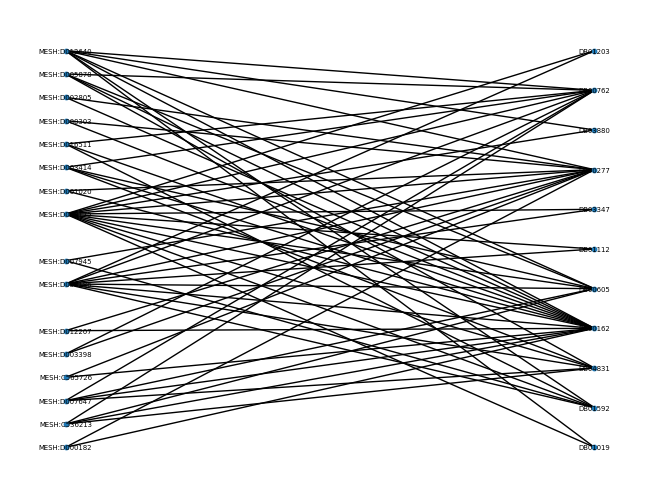

In [91]:
nx.draw(babyG, 
        pos = nx.layout.bipartite_layout(
            babyG, 
            list(np.intersect1d(names_degrees[:,0], diseases)) 
            )
        , node_size = 10.
        , with_labels = True
        , font_size = 5
       )

In [106]:
degrees = [G.degree(n) for n in G.nodes]
names_degrees = np.c_[ [n for n in G.nodes], degrees ]
grado_medio_vicini = np.array([
       [G.degree(n), np.mean([ G.degree(g) for g in G.neighbors(n)])]
    for n in names_degrees[:,0]
])
grado_medio_vicini = np.array([
        [deg, np.mean(grado_medio_vicini[ grado_medio_vicini[:,0] == deg][:,1])]
    for deg in np.unique(grado_medio_vicini[:,0])
])
grado_medio_vicini

array([[1.00000000e+00, 9.74675373e+02],
       [2.00000000e+00, 9.97459732e+02],
       [3.00000000e+00, 1.16896615e+03],
       ...,
       [2.85900000e+03, 1.53388248e+02],
       [3.12000000e+03, 1.39574359e+02],
       [3.59300000e+03, 1.24327581e+02]])

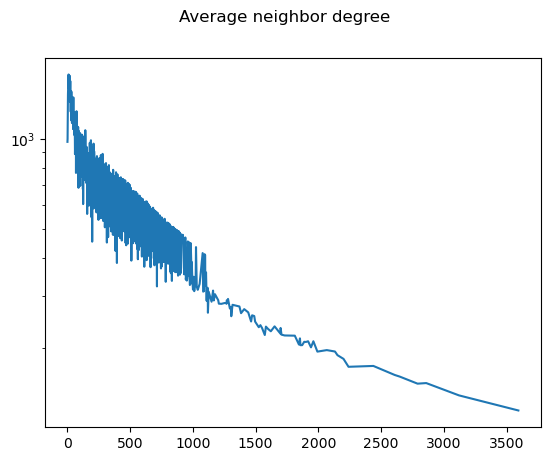

In [110]:
plt.suptitle("Average neighbor degree")
plt.semilogy(grado_medio_vicini[:,0],grado_medio_vicini[:,1])

# Average degree for chemicals and diseases

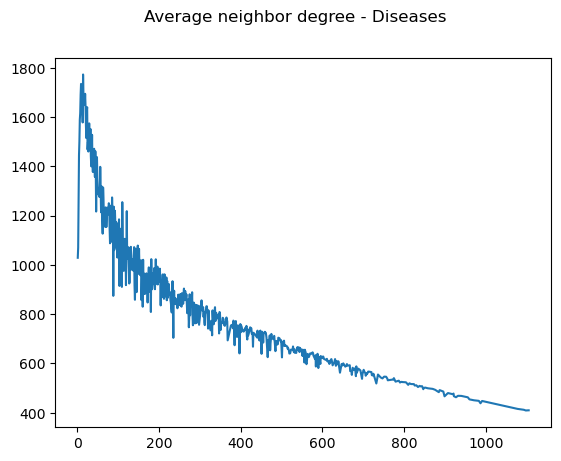

In [117]:
category = diseases
degrees = [G.degree(n) for n in category]
names_degrees = np.c_[ [n for n in category], degrees ]
grado_medio_vicini = np.array([
       [G.degree(n), np.mean([ G.degree(g) for g in G.neighbors(n)])]
    for n in names_degrees[:,0]
])
grado_medio_vicini = np.array([
        [deg, np.mean(grado_medio_vicini[ grado_medio_vicini[:,0] == deg][:,1])]
    for deg in np.unique(grado_medio_vicini[:,0])
])

plt.suptitle("Average neighbor degree - Diseases")
plt.plot(grado_medio_vicini[:,0], grado_medio_vicini[:,1])